In [1]:
# import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load data
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
# define X and y 
X = data.drop(['labels'], axis = 1)
y = data.loc[:, 'labels']

In [7]:
# count the labels
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

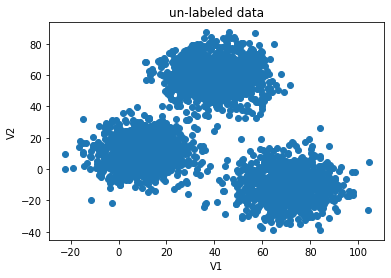

In [8]:
# visualize the data
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'], X.loc[:, 'V2'])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

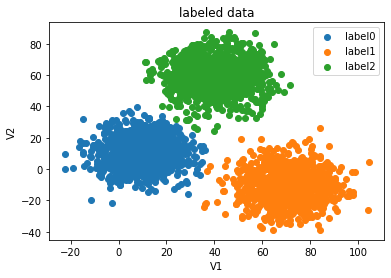

In [9]:
# visualize the labeled data 
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title('labeled data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.show()

In [10]:
# set up KMeans model 
KM = KMeans(n_clusters = 3, random_state = 0)

In [11]:
# train the model
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [12]:
# extracting centers from KMeans model
centers = KM.cluster_centers_
print(centers)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


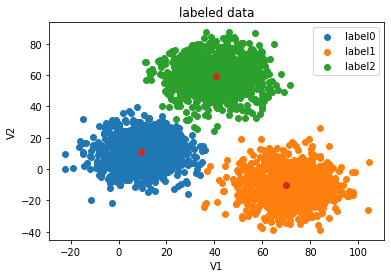

In [13]:
# visualize the labeled data with centers from KMenas model
fig3 = plt.figure()

label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title('labeled data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))

plt.scatter(centers[:,0], centers[:,1])

plt.show()

In [14]:
# make a prediction on a random test data (v1 = 80, V2 = 60)
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[1]


In [15]:
# make a prediction on training data
y_predict = KM.predict(X)

In [17]:
# calculate the accuracy
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.0023333333333333335


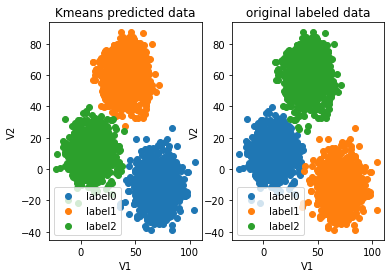

In [29]:
# visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict == 0], X.loc[:, 'V2'][y_predict == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict == 1], X.loc[:, 'V2'][y_predict == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict == 2], X.loc[:, 'V2'][y_predict == 2])

plt.title('Kmeans predicted data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title('original labeled data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))

plt.show()

In [19]:
# correct results' position in kmeans preddicted data
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(1)
    elif i == 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)

In [20]:
print(accuracy_score(y, y_corrected))

0.997


In [21]:
# set up a KNN model
KNN = KNeighborsClassifier(n_neighbors = 3)

In [22]:
# train the model 
KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# make a prediction on a random test data (v1 = 80, V2 = 60)
y_predict_knn_test = KNN.predict([[80,60]])
print(y_predict_knn_test)

[2]


In [24]:
# make a prediction on training data
y_predict_knn = KNN.predict(X)
print('knn accuracy:', accuracy_score(y, y_predict_knn))

knn accuracy: 1.0


In [25]:
# set up meanshift model
bw = estimate_bandwidth(X, n_samples = 500)
ms = MeanShift(bandwidth = bw)

In [26]:
# train the model
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [27]:
# make a prediction on training data
y_predict_ms = ms.predict(X)
print(accuracy_score(y, y_predict_ms))

0.31966666666666665


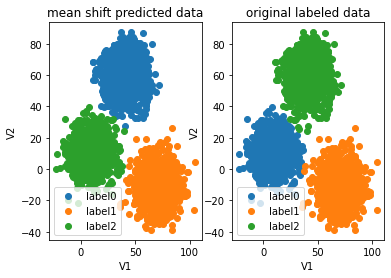

In [30]:
# visualize the ms result 
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict_ms == 0], X.loc[:, 'V2'][y_predict_ms == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict_ms == 1], X.loc[:, 'V2'][y_predict_ms == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict_ms == 2], X.loc[:, 'V2'][y_predict_ms == 2])

plt.title('mean shift predicted data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title('original labeled data')
plt.xlabel('V1')
plt.ylabel('V2')

plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))

plt.show()

In [34]:
# correct mean shift results
y_corrected = []
for i in y_predict_ms:
    if i == 0:
        y_corrected.append(2)
    elif i == 2:
        y_corrected.append(0)
    else:
        y_corrected.append(1)

In [36]:
print(accuracy_score(y, y_corrected))

0.997
